<a href="https://colab.research.google.com/github/ambgeo/Youtube/blob/main/00_GeoBR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#instalando pacotes
!pip install geobr

In [19]:
##Importando pacotes
import geopandas as gpd
import geobr
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
##Dados disponíveis
geobr.list_geobr()


Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

In [5]:
##Dados dos estados brasileiros
estados = geobr.read_state(code_state="RJ", year=2020)


In [6]:
##Municipios
muni = geobr.read_municipality(code_muni='all', year=2020)
muni.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,1100015.0,Alta Floresta D'oeste,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.19465 -11.82746, -62.18945..."
1,1100023.0,Ariquemes,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.53648 -9.73222, -62.52765 ..."
2,1100031.0,Cabixi,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-60.37119 -13.36655, -60.37661..."
3,1100049.0,Cacoal,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.0008 -11.29737, -61.00103 ..."
4,1100056.0,Cerejeiras,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.49976 -13.00525, -61.49426..."


In [7]:
##Filtrando só os municípios do RJ e depois só um dos municipios
muni_rj = muni[muni['abbrev_state'] == 'RJ']
muni_rj.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
3175,3300100.0,Angra Dos Reis,33.0,RJ,Rio de Janeiro,3.0,Sudeste,"MULTIPOLYGON (((-44.15109 -23.21602, -44.14913..."
3176,3300159.0,Aperibé,33.0,RJ,Rio de Janeiro,3.0,Sudeste,"MULTIPOLYGON (((-42.12536 -21.60155, -42.12399..."
3177,3300209.0,Araruama,33.0,RJ,Rio de Janeiro,3.0,Sudeste,"MULTIPOLYGON (((-42.18387 -22.55144, -42.18211..."
3178,3300225.0,Areal,33.0,RJ,Rio de Janeiro,3.0,Sudeste,"MULTIPOLYGON (((-43.03716 -22.16429, -43.03399..."
3179,3300233.0,Armação Dos Búzios,33.0,RJ,Rio de Janeiro,3.0,Sudeste,"MULTIPOLYGON (((-41.91855 -22.81574, -41.91802..."


In [8]:
##Filtrando só o Municipio de Rio Clar
muni_rj_rio_claro = muni_rj[muni_rj['name_muni'] == 'Rio Claro']
muni_rj_rio_claro.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
3239,3304409.0,Rio Claro,33.0,RJ,Rio de Janeiro,3.0,Sudeste,"MULTIPOLYGON (((-44.0324 -22.63978, -44.02701 ..."


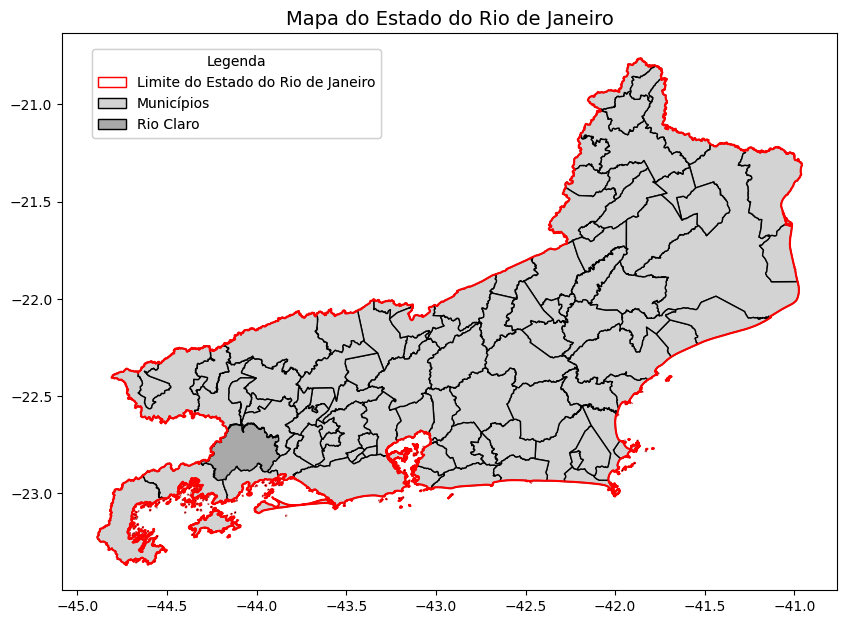

In [34]:
# 1. Crie a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 10))

# 2. Plote os dados, mas sem o parâmetro 'label' -- pois criaremos a legenda manualmente
# Limite do estado em vermelho (contorno)
estados.boundary.plot(
    ax=ax,
    color='red'  # se quiser em preto, basta trocar por 'black'
)

# Municípios com contorno em preto e preenchimento em cinza claro
muni_rj.plot(
    ax=ax,
    edgecolor='black',
    facecolor='lightgray'
)

# Município de Rio Claro com contorno em preto e preenchimento em cinza escuro
muni_rj_rio_claro.plot(
    ax=ax,
    edgecolor='black',
    facecolor='darkgray'
)

# 3. Crie patches (retângulos “fake”) para cada categoria que você quer na legenda
patch_limite = patches.Patch(
    facecolor='none',      # sem cor de preenchimento
    edgecolor='red',       # mesma cor do boundary
    label='Limite do Estado do Rio de Janeiro'
)
patch_municipios = patches.Patch(
    facecolor='lightgray',
    edgecolor='black',
    label='Municípios'
)
patch_rio_claro = patches.Patch(
    facecolor='darkgray',
    edgecolor='black',
    label='Rio Claro'
)

# 4. Monte a (única) legenda unindo esses patches
legenda = ax.legend(
    handles=[patch_limite, patch_municipios, patch_rio_claro],
    loc='lower left',        # ou 'best', se preferir
    bbox_to_anchor=(0.03, 0.8),
    frameon=True,
    title="Legenda",
    title_fontsize=10
)

# Caso queira, adicione a legenda ao eixo explicitamente (caso crie mais de uma)
fig.gca().add_artist(legenda)

# 5. Título do mapa
ax.set_title("Mapa do Estado do Rio de Janeiro", fontsize=14)

# Exiba o resultado
plt.show()
